# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [64]:
df = pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [65]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [67]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [68]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [69]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [70]:
columns=['Gender']
for i in columns:
    print('The unique values in:',df[i].unique())

The unique values in: ['Male' 'Female']


### Convert male to 0 and Female to 1 in Gender column

In [71]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [72]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

In [73]:
df.drop(columns=['User ID'],inplace=True )
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

[]

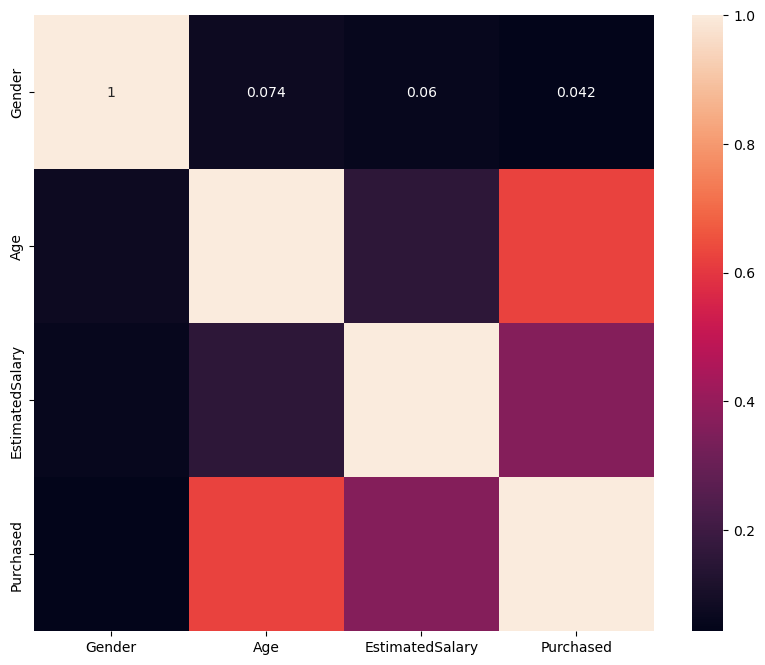

In [74]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)
plt.plot()

### Plot a countplot of gender with respect to purchased

In [75]:
type('Purchased')

str

<function matplotlib.pyplot.show(close=None, block=None)>

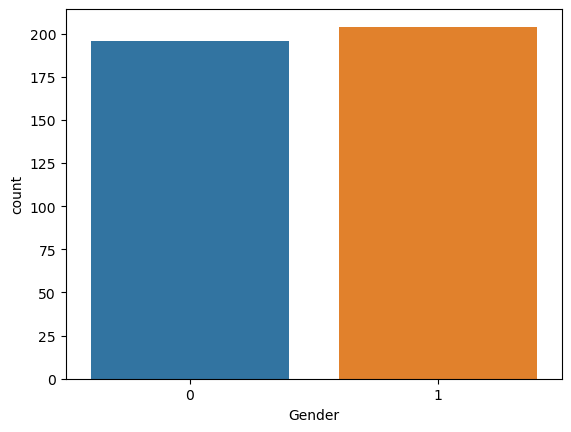

In [76]:
df['Gender'] = df['Gender'].astype(int)
df['Purchased'] = df['Purchased'].astype(int)
sns.countplot(x='Gender',data=df)
plt.show

### Plot a displot of Age

C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


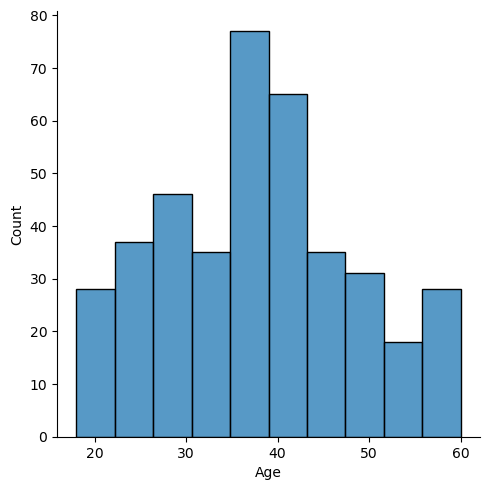

In [77]:
sns.displot(x='Age',data=df)

### Plot pairplot of the dataset

In [78]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

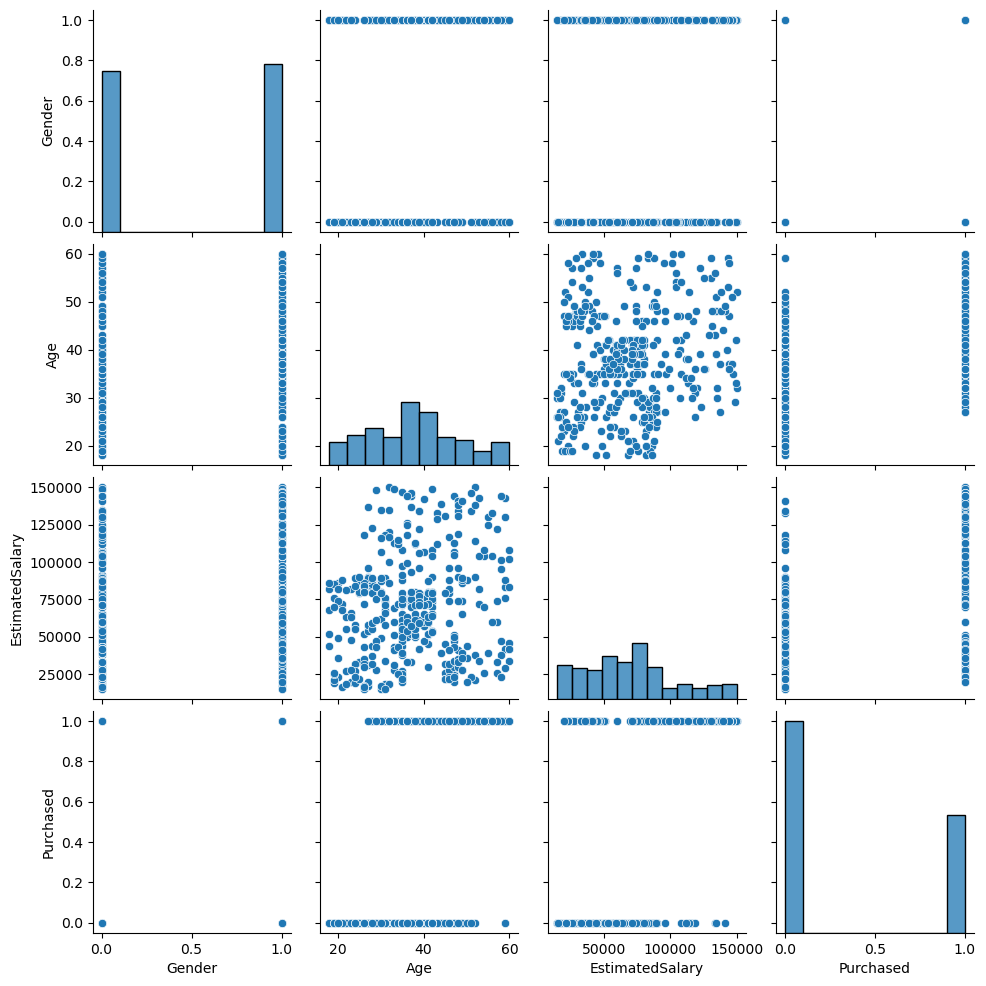

In [79]:
sns.pairplot(df)

## Data Preprocessing

### Split the dataset into input and target variables

In [80]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [81]:
X=df.drop(columns=['Purchased'],axis=1)
y=df['Purchased']

In [82]:
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


### Scale the data using StandardScaler

In [83]:
from sklearn.preprocessing import StandardScaler

### Split the dataset into training and testing set

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42)

### Check shape of X_train and X_test

In [86]:
X_train.shape

(280, 3)

In [87]:
X_test.shape

(120, 3)

## ML Models

### Logistic Regression Classifier

In [88]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [89]:
model = LogisticRegression()

In [90]:
cv_score_list = {}
def model_score(model):
    model.fit(X_train,y_train)
    print('The score of our trained model is :',model.score(X_train,y_train),end='\n\n')
    print('#'*100)
    y_pred = model.predict(X_test)
    print('The accuracy score of the model :',metrics.accuracy_score(y_test,y_pred),end='\n\n')
    print('#'*100)
    print('confusion metrics')
    print(metrics.confusion_matrix(y_test,y_pred),end='\n\n')
    print('#'*100,end='\n\n')
    print(metrics.classification_report(y_test,y_pred))
    print('#'*100,end='\n\n')
    cv_score = np.mean(cross_val_score(model,X_train,y_train))
    print('Cross validation Score Mean :',cv_score)
    cv_score_list[str(model)[:-2]] = cv_score
    

In [91]:
model_score(LogisticRegression())

The score of our trained model is : 0.6571428571428571

####################################################################################################
The accuracy score of the model : 0.6083333333333333

####################################################################################################
confusion metrics
[[73  0]
 [47  0]]

####################################################################################################

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        73
           1       0.00      0.00      0.00        47

    accuracy                           0.61       120
   macro avg       0.30      0.50      0.38       120
weighted avg       0.37      0.61      0.46       120

####################################################################################################

Cross validation Score Mean : 0.6571428571428571


C:\Users\Pakistan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pakistan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pakistan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rd = RandomForestClassifier()

In [94]:
rd.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
model_score(RandomForestClassifier(n_estimators=20))

The score of our trained model is : 0.9928571428571429

####################################################################################################
The accuracy score of the model : 0.8916666666666667

####################################################################################################
confusion metrics
[[68  5]
 [ 8 39]]

####################################################################################################

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        73
           1       0.89      0.83      0.86        47

    accuracy                           0.89       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120

####################################################################################################

Cross validation Score Mean : 0.875


### Support Vector Machine

In [99]:
from sklearn.svm import SVC

In [100]:
model_score(SVC())

The score of our trained model is : 0.7785714285714286

####################################################################################################
The accuracy score of the model : 0.7333333333333333

####################################################################################################
confusion metrics
[[70  3]
 [29 18]]

####################################################################################################

              precision    recall  f1-score   support

           0       0.71      0.96      0.81        73
           1       0.86      0.38      0.53        47

    accuracy                           0.73       120
   macro avg       0.78      0.67      0.67       120
weighted avg       0.77      0.73      0.70       120

####################################################################################################

Cross validation Score Mean : 0.7678571428571429


### Assign cross val scores of all models into a dataframe

In [101]:
cv_score_list

{'LogisticRegression': 0.6571428571428571,
 'RandomForestClassifier(n_estimators=2': 0.875,
 'SVC': 0.7678571428571429}

In [102]:
pd.DataFrame(cv_score_list,index=[0]).T.reset_index().rename(columns={'index':'Model',0:'Score'})

,Model,Score
0,LogisticRegression,0.657143
1,RandomForestClassifier(n_estimators=2,0.875000
2,SVC,0.767857


## Deploy the model with highest score using Tkinter

In [ ]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [1]:
from tkinter import *
from tkinter import ttk
import pickle
from PIL import Image, ImageTk
import numpy as np

### Define a function that will output to an entry box in Tkinter

In [2]:
with open('model (1).pkl','rb') as f:
    new_model = pickle.load(f)
def predict_output(age,estimated_salary,is_male=1,):
    observation = np.array([age,
              estimated_salary])
    prediction_value = new_model.predict(observation.reshape(1,-1))
    if prediction_value[0]==1:
        print('Person will Purchase')
    else:
        print('Person will not Purchase')

predict_output(22,1,20000)

Person will Purchase


C:\Users\Pakistan\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Create Tkinter window with all necessary entryboxes and labels

In [ ]:
root = Tk()
root.geometry('500x500')
root.resizable(False,False)

with open('model (1).pkl','rb') as f:
    new_model = pickle.load(f)

def predict_out():
    if gender_var.get() == 'male':
        gender=1
    else:
        gender=0
        
    observation = np.array([int(age_entry.get()),
              int(salary_entry.get())
             ])
    print(observation.reshape(1,-1))
    prediction_value = new_model.predict(observation.reshape(1,-1))
    if prediction_value[0]==1:
        prediction_var.set('Person will Purchase')
    else:
        prediction_var.set('Person will not Purchase')

# Main Title
Label(master=root,text='Customer Classification',bg='#ffd966',fg='White',font=('serif',28,'bold'),width='30',height=2).pack()

# New Frame for Input form
input_frame = Frame(root,width=500,height=400,highlightbackground='#ffd966',highlightthickness=7)
input_frame.place(x=0,y=100)

image = Image.open("img.jpg")
resize_image = image.resize((600,600))

background_image = ImageTk.PhotoImage(resize_image)
background_label = Label(input_frame, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

# label for age
age_label = Label(master=input_frame,text='Enter Age',bg='#ffd966',fg='Black',width='25',height=2,font=('serif',10,'bold'))
age_label.place(x=30,y=60)

# Entry space for age
age_entry = Entry(master=input_frame,width='16',bg='#ffd966',font=('Ariel',15),fg='Black')
age_entry.place(x=280,y=67)

# Variable to store radiobutton chooosing value
gender_var = IntVar()
# setting defualt
gender_var.set(0)

# gender label
Gender_label = Label(master=input_frame,text='Choose your Gender',bg='#ffd966',fg='Black',width='25',height=2,font=('serif',10,'bold'))
Gender_label.place(x=30,y=125)

# gender radio button - Male
radio_male = Radiobutton(master=input_frame,text='Male   ',value=0,variable=gender_var,bg='#ffd966',font=('serif',12,'bold'))
radio_male.place(x=380,y=130)

# gender radio button - Male
radio_female = Radiobutton(master=input_frame,text='Female',value=1,variable=gender_var,bg='#ffd966',font=('serif',12,'bold'))
radio_female.place(x=280,y=130)



# Variable to store radiobutton chooosing value
salary_var = IntVar()

# label for age
salary_label = Label(master=input_frame,text='Enter Salary',bg='#ffd966',fg='Black',width='25',height=2,font=('serif',10,'bold'))
salary_label.place(x=30,y=195)

# Entry space for age
salary_entry = Entry(master=input_frame,width='16',bg='#ffd966',fg='Black',font=('serif',15))
salary_entry.place(x=280,y=200)


# Prediction Button and Entry
prediction_var = StringVar()
prediction_var.set(' ')
predict_button = Button(input_frame, text = 'Predict',width=10 , bg='#ffd966',fg='Black',font=('serif',10,'bold'),command=predict_out)
predict_button.place(x=196,y=320)
prediction_entry = Entry(master=input_frame,width=21,bd=5,bg='#ffd966',textvariable=prediction_var,font=('serif',12,'bold'))
prediction_entry.place(x=147,y=270)


root.mainloop()

C:\Users\Pakistan\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


***